In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
train_df = pd.read_csv('train.csv')
train_df.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass


In [81]:
for index, row in train_df.iterrows():
    assets = str(row['Total Assets'])
    if (assets == '0'):
        train_df.at[index, 'Total Assets'] = int(0)
    else:
        num, magnitude = assets.split(" ")
        num = int(num)
        if (magnitude == 'Crore+'):
            num *= 1_00_00_000
        elif (magnitude == 'Lac+'):
            num *= 1_00_000
        elif (magnitude == 'Thou+'):
            num *= 1000
        elif (magnitude == 'Hund+'):
            num *= 100

        train_df.at[index, 'Total Assets'] = int(num)
    
    liabilities = str(row['Liabilities'])
    if (liabilities == '0'):
        train_df.at[index, 'Liabilities'] = int(0)
    else:
        num, magnitude = liabilities.split(" ")
        num = int(num)
        if (magnitude == 'Crore+'):
            num *= 1_00_00_000
        elif (magnitude == 'Lac+'):
            num *= 1_00_000
        elif (magnitude == 'Thou+'):
            num *= 1000
        elif (magnitude == 'Hund+'):
            num *= 100

        train_df.at[index, 'Liabilities'] = int(num)

In [82]:
train_df['Total Assets'] = pd.to_numeric(train_df['Total Assets'])
train_df['Liabilities'] = pd.to_numeric(train_df['Liabilities'])

In [83]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              2059 non-null   int64 
 1   Candidate       2059 non-null   object
 2   Constituency ∇  2059 non-null   object
 3   Party           2059 non-null   object
 4   Criminal Case   2059 non-null   int64 
 5   Total Assets    2059 non-null   int64 
 6   Liabilities     2059 non-null   int64 
 7   state           2059 non-null   object
 8   Education       2059 non-null   object
dtypes: int64(4), object(5)
memory usage: 144.9+ KB


In [84]:
train_df.describe()

,ID,Criminal Case,Total Assets,Liabilities
count,2059.000000,2059.000000,2.059000e+03,2.059000e+03
mean,1029.000000,1.777562,1.155991e+08,2.159068e+07
std,594.526422,4.762183,4.922465e+08,2.048612e+08
min,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,514.500000,0.000000,9.500000e+06,4.850000e+04
50%,1029.000000,0.000000,2.000000e+07,1.800000e+06
75%,1543.500000,2.000000,8.000000e+07,8.900000e+06
max,2058.000000,87.000000,1.267000e+10,8.810000e+09


In [85]:
print("Unique constituencies: ", len(np.unique(train_df['Constituency ∇'])))
print("Unique parties: ", len(np.unique(train_df['Party'])))
print("Unique states: ", len(np.unique(train_df['state'])))
print("Unique educations: ", len(np.unique(train_df['Education'])))

Unique constituencies:  2037
Unique parties:  23
Unique states:  28
Unique educations:  10


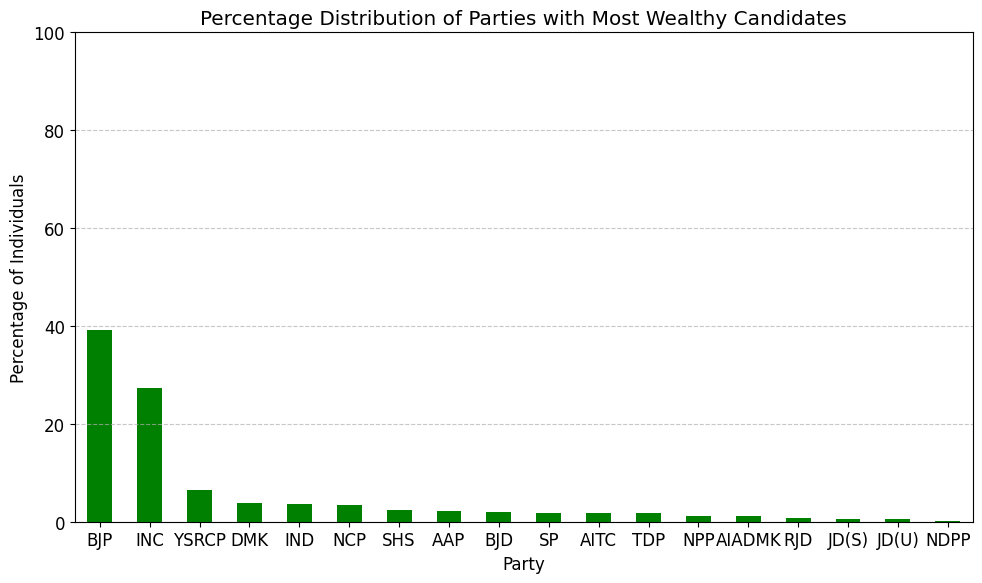

In [86]:
sorted_df = train_df.sort_values(by='Total Assets', ascending=False)


top_25_percent = sorted_df.head(int(len(sorted_df) * 0.20))

party_percentage = top_25_percent['Party'].value_counts(normalize=True) * 100


plt.figure(figsize=(10, 6))
party_percentage.plot(kind='bar', color='green')
plt.title('Percentage Distribution of Parties with Most Wealthy Candidates')
plt.xlabel('Party')
plt.ylabel('Percentage of Individuals')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Percentage Distribution of Parties With Criminal Cases
Party
AAP                   6.060606
AIADMK                1.082251
AITC                  6.060606
BJD                   3.138528
BJP                  32.467532
CPI                   0.216450
CPI(M)                3.246753
DMK                   5.735931
INC                  20.238095
IND                   1.731602
JD(S)                 0.541126
JD(U)                 0.865801
JMM                   0.865801
NCP                   1.948052
NPP                   0.216450
RJD                   3.463203
SHS                   1.948052
SP                    4.545455
TDP                   0.216450
Tipra Motha Party     0.108225
YSRCP                 5.303030
Name: Criminal Case, dtype: float64


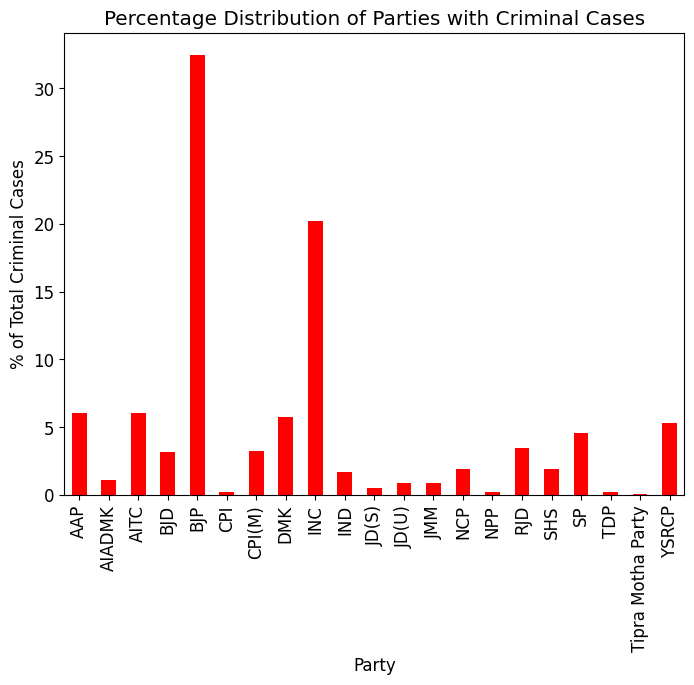

In [87]:
# make the percentage distribution of parties with criminal cases
criminal_cases = train_df[train_df['Criminal Case'] > 0]
party_counts = criminal_cases.groupby('Party')['Criminal Case'].count() / len(criminal_cases) * 100
print("Percentage Distribution of Parties With Criminal Cases")
print(party_counts)

# plotting the percentage distribution of parties with criminal cases
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
party_counts.sort_index().plot(kind='bar', color='red')
plt.title('Percentage Distribution of Parties with Criminal Cases')
#give name of party as xlabel
plt.xlabel('Party')
plt.ylabel('% of Total Criminal Cases')
plt.show()

In [88]:
train_df = train_df.drop(columns=['ID', 'Candidate', 'Constituency ∇'], axis=1)
train_df.head()

,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,DMK,4,2110000000,20000000,TAMIL NADU,8th Pass
1,BJP,0,10000000,0,MADHYA PRADESH,12th Pass
2,INC,0,70000000,2200000,KARNATAKA,Post Graduate
3,BJP,0,90000000,2400000,BIHAR,Post Graduate
4,BJP,2,20000000,6100000,WEST BENGAL,8th Pass


In [89]:
from sklearn.preprocessing import LabelEncoder

education_encoder = LabelEncoder().fit(train_df['Education'])
state_encoder = LabelEncoder().fit(train_df['state'])
party_encoder = LabelEncoder().fit(train_df['Party'])

train_df['Education'] = education_encoder.transform(train_df['Education'])
train_df['state'] = state_encoder.transform(train_df['state'])
train_df['Party'] = party_encoder.transform(train_df['Party'])

train_df.head()

,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,7,4,2110000000,20000000,23,3
1,4,0,10000000,0,13,1
2,8,0,70000000,2200000,11,9
3,4,0,90000000,2400000,3,9
4,4,2,20000000,6100000,27,3


In [90]:
Y = train_df['Education']
X = train_df.drop(columns=['Education'], axis=1)

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, random_state=42, train_size=0.85, shuffle=True) 

In [92]:
X_train, Y_train

(      Party  Criminal Case  Total Assets  Liabilities  state
 1778     18              2      20000000      4500000     25
 774      15              0      50000000      5200000     15
 1418      8              8      20000000      7900000     13
 218       4              0       1600000            0      3
 1999      2              9       5600000      1500000     27
 ...     ...            ...           ...          ...    ...
 1638      3              1     110000000      2000000     18
 1095     16              9      80000000      4100000      3
 1130      7              9     130000000            0     23
 1294      8              0     150000000      9100000     11
 860      15              0      10000000            0     16
 
 [1750 rows x 5 columns],
 1778    5
 774     9
 1418    9
 218     5
 1999    1
        ..
 1638    6
 1095    9
 1130    9
 1294    6
 860     1
 Name: Education, Length: 1750, dtype: int64)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = []
models.append(LogisticRegression().fit(X_train, Y_train))
models.append(DecisionTreeClassifier().fit(X_train, Y_train))
models.append(RandomForestClassifier().fit(X_train, Y_train))
models.append(KNeighborsClassifier(n_neighbors=5).fit(X_train, Y_train))

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.23942857142857144


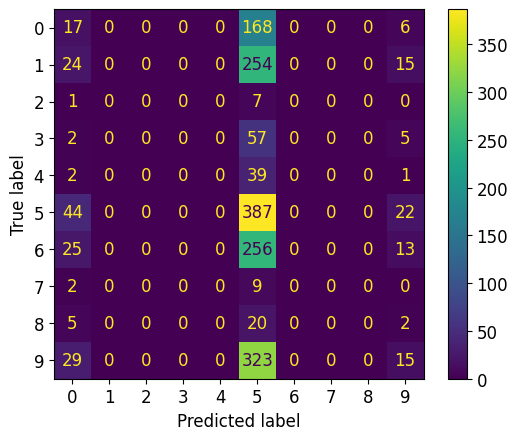

Accuracy:  0.972


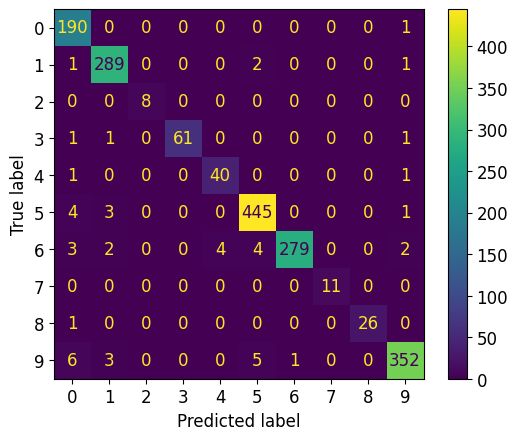

Accuracy:  0.972


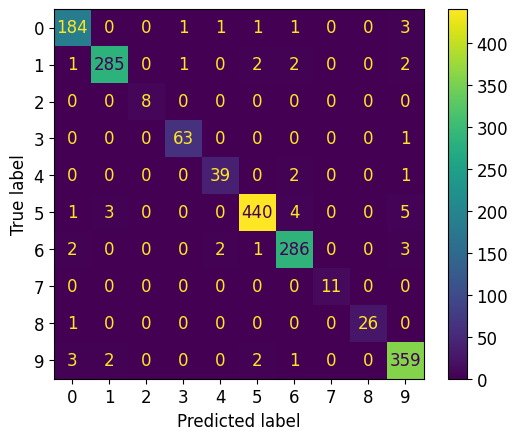

Accuracy:  0.46514285714285714


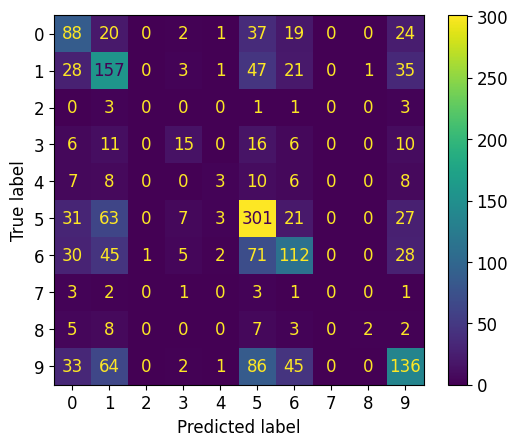

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

for model in models:
    Y_pred = model.predict(X_train)
    print("Accuracy: ", accuracy_score(Y_train, Y_pred))

    cm = confusion_matrix(Y_train, Y_pred)
    display = ConfusionMatrixDisplay(cm)
    display.plot()

    plt.show()

Accuracy:  0.23948220064724918


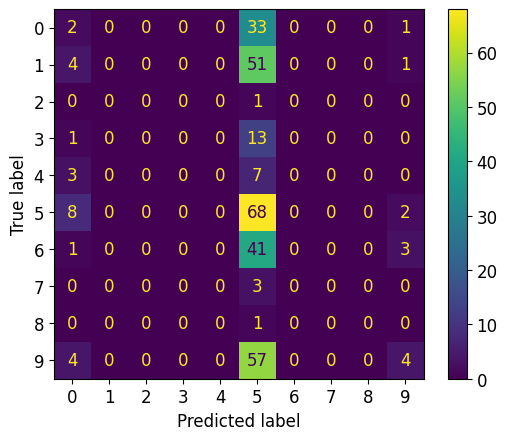

Accuracy:  0.1553398058252427


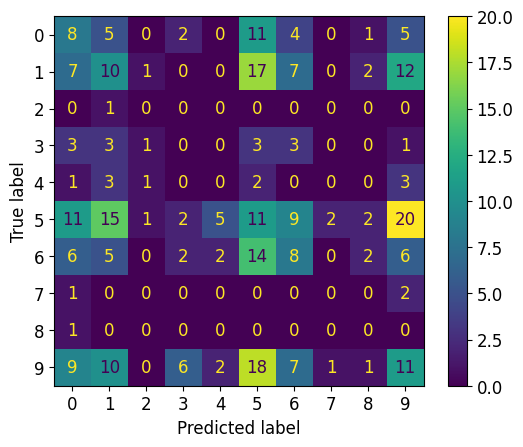

Accuracy:  0.20711974110032363


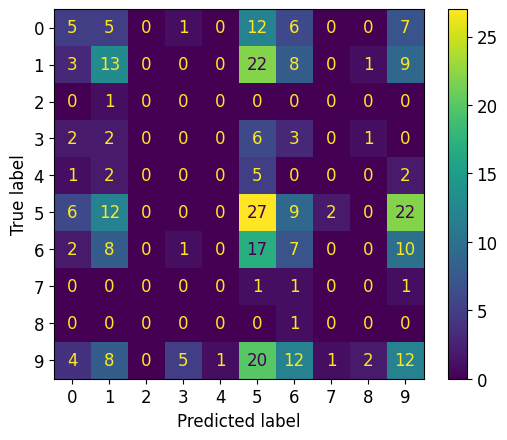

Accuracy:  0.15210355987055016


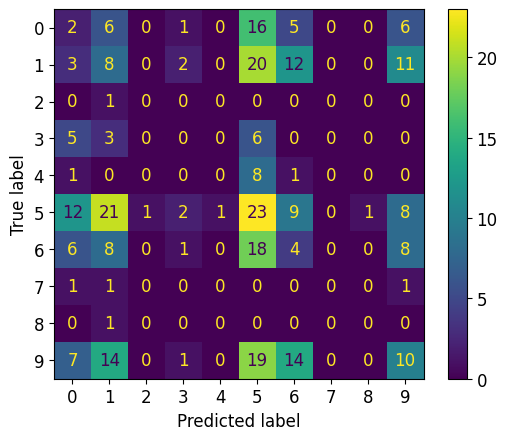

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

for model in models:
    Y_pred = model.predict(X_valid)
    print("Accuracy: ", accuracy_score(Y_valid, Y_pred))

    cm = confusion_matrix(Y_valid, Y_pred)
    display = ConfusionMatrixDisplay(cm)
    display.plot()

    plt.show()

                  Party  Criminal Case  Total Assets  Liabilities     state  \
Party          1.000000       0.110415      0.057602     0.019578 -0.325900   
Criminal Case  0.110415       1.000000     -0.012985    -0.000981  0.074785   
Total Assets   0.057602      -0.012985      1.000000     0.597508 -0.077022   
Liabilities    0.019578      -0.000981      0.597508     1.000000 -0.031056   
state         -0.325900       0.074785     -0.077022    -0.031056  1.000000   
Education     -0.002965      -0.005312      0.003603     0.009539  0.068529   

               Education  
Party          -0.002965  
Criminal Case  -0.005312  
Total Assets    0.003603  
Liabilities     0.009539  
state           0.068529  
Education       1.000000  


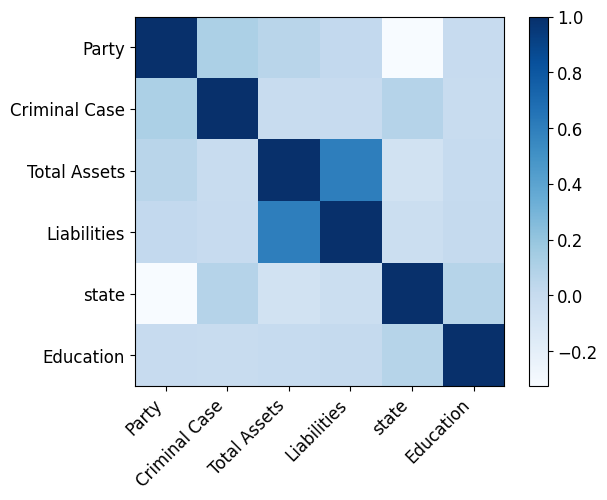

<Figure size 640x480 with 0 Axes>

In [96]:
correlation_matrix = train_df.corr()
print(correlation_matrix)

#plotting correlation matrix 
plt.imshow(correlation_matrix, cmap='Blues')

#adding colorbar 
plt.colorbar()

#extracting variable names 
variables = []
for i in correlation_matrix.columns:
  variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(correlation_matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix)), variables)

# Display the plot
plt.show()
plt.show()
plt.savefig('correlation_matrix.png')



In [97]:
test_df = pd.read_csv('test.csv')
for index, row in test_df.iterrows():
    assets = str(row['Total Assets'])
    if (assets == '0'):
        test_df.at[index, 'Total Assets'] = int(0)
    else:
        num, magnitude = assets.split(" ")
        num = int(num)
        if (magnitude == 'Crore+'):
            num *= 1_00_00_000
        elif (magnitude == 'Lac+'):
            num *= 1_00_000
        elif (magnitude == 'Thou+'):
            num *= 1000
        elif (magnitude == 'Hund+'):
            num *= 100

        test_df.at[index, 'Total Assets'] = int(num)
    
    liabilities = str(row['Liabilities'])
    if (liabilities == '0'):
        test_df.at[index, 'Liabilities'] = int(0)
    else:
        num, magnitude = liabilities.split(" ")
        num = int(num)
        if (magnitude == 'Crore+'):
            num *= 1_00_00_000
        elif (magnitude == 'Lac+'):
            num *= 1_00_000
        elif (magnitude == 'Thou+'):
            num *= 1000
        elif (magnitude == 'Hund+'):
            num *= 100

        test_df.at[index, 'Liabilities'] = int(num)
   

test_df_new = test_df.drop(columns=['ID', 'Candidate', 'Constituency ∇'], axis=1)
test_df_new['state'] = state_encoder.transform(test_df['state'])
test_df_new['Party'] = party_encoder.transform(test_df['Party'])

test_df_new.head()

,Party,Criminal Case,Total Assets,Liabilities,state
0,9,2,700000000,110000000,14
1,2,1,20000000,1300000,27
2,13,3,490000000,10000000,14
3,2,1,20000000,0,27
4,18,0,160000000,20000000,25


In [98]:
output = models[2].predict(test_df_new)
#check the first two letters of the Candidate column and if it is Dr make the prediction as Doctorate 
        
output = education_encoder.inverse_transform(output)
for index, row in test_df.iterrows():
    if row['Candidate'][:3] == 'Dr.':
        output[index] = "Doctorate"
    if row['Candidate'][:4] == 'Adv.':
        output[index] = "Graduate Professional"
output = pd.DataFrame(output)

In [99]:
output.to_csv('prediction.csv')